In [2]:
## UpGrad Lending Club Case Study
### The company wants to understand the driving factors behind loan default, 
### i.e. the variables which are strong indicators of default.
### The company can utilise this knowledge for its portfolio and risk assessment.

In [3]:
## Loading necessary Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
cwd = os.getcwd()
print(cwd)

/Users/sibiz


In [5]:
## Importing Loan dataset, setting low_memory to false so that importing is smooth
df_loan = pd.read_csv("loan.csv" ,low_memory=False)

In [6]:
## Glimpse of the dataset uploaded
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
#    ********************** Preprocessing  **********************                      

In [8]:
## Identifying columns which are having missing values by printing percentage of missing values in each column

missing_value = round(100*(df_loan.isnull().sum()/len(df_loan.id)), 2)
print(missing_value)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [9]:
# Checking columns with more than 30% of missing values
col_missing_value = list(missing_value[missing_value >= 30].index)
len(col_missing_value)

58

In [10]:
# Dropping columns with more than 30% of missing values
df_loan = df_loan.drop(col_missing_value,axis=1)
df_loan.shape

(39717, 53)

In [11]:
## Looking at the dataset and also looking at the data dictionary
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [12]:
df_loan.nunique(axis=0).sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [13]:
## Deleting columns (tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq, application_type, policy_code)
## collections_12_mths_ex_med, initial_list_status, pymnt_plan) which just have one value for all the rows as these may not help in any analysis

df_loan_nodup = df_loan.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 
                  'acc_now_delinq', 'application_type', 'policy_code',
                 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1)

df_loan_nodup.shape

(39717, 44)

In [14]:
## Dropping columns which are related to customer's repayment behavior as the objective of the analysis to 
## identify before loan disbursement if if a person is likely to default, which may be used for taking actions such 
## as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc

df_loan_nodup = df_loan_nodup.drop(['delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 
        'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis=1)

df_loan_nodup.shape

(39717, 24)

In [15]:
## Removing potential redundant columns i.e. columns containing same information

### 1. Amount related duplicate columns like loan_amnt, funded_amnt, funded_amnt_inv will not provide customer traits

print (df_loan_nodup.funded_amnt, df_loan_nodup.funded_amnt_inv)

df_loan_nodup.drop(['funded_amnt', 'funded_amnt_inv'], axis = 1, inplace= True)

df_loan_nodup.shape

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: funded_amnt, Length: 39717, dtype: int64 0         4975.0
1         2500.0
2         2400.0
3        10000.0
4         3000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 39717, dtype: float64


(39717, 22)

In [16]:
## Removing potential non helpful columns id, member_id, url are unique identifiers hence dont seem to be adding any value

df_loan_nodup.id.value_counts().head(10)
df_loan_nodup.member_id.value_counts().head(10)
df_loan_nodup.url.value_counts().head(10)

df_loan_nodup = df_loan_nodup.drop(['id', 'member_id', 'url'], axis = 1)

df_loan_nodup.shape


(39717, 19)

In [17]:
df_loan_nodup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  title                 39706 non-null  object 
 15  zip_code           

In [18]:
## Since we will not know the outcome of the current loans its better to drop these rows

df_loan_nodup['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [19]:
loan = df_loan_nodup[df_loan_nodup['loan_status'] != 'Current']
loan.shape

(38577, 19)

In [20]:
##  There are some NULL values present, so lets remove the rows with NULL values from the above columns

loan.dropna(subset=['emp_title','emp_length','title', 'pub_rec_bankruptcies'], inplace=True)
loan.shape


(35473, 19)

In [21]:
###Checking the data to identify the massaging required in order to aid data manipulation

loan.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0.0
7,3000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,900xx,CA,5.35,0.0
9,5375,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,Building my credit history.,774xx,TX,18.08,0.0
10,6500,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,0.0
11,12000,36 months,12.69%,402.54,B,B5,UCLA,10+ years,OWN,75000.0,Source Verified,Dec-11,Fully Paid,debt_consolidation,Consolidation,913xx,CA,10.78,0.0
12,9000,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,debt_consolidation,freedom,245xx,VA,10.08,0.0
13,3000,36 months,9.91%,96.68,B,B1,Target,3 years,RENT,15000.0,Source Verified,Dec-11,Fully Paid,credit_card,citicard fund,606xx,IL,12.56,0.0


In [22]:
### Cleaning column 'term' by removing months from the values

loan['term'] = loan['term'].str.rstrip('months')
loan['term'].value_counts()

 36     26465
 60      9008
Name: term, dtype: int64

In [23]:
### Cleaning column 'int_rate' by removing % from the values
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['int_rate'].value_counts()


10.99    862
11.49    739
7.51     732
13.49    711
7.88     674
        ... 
18.72      1
13.30      1
11.22      1
16.20      1
9.83       1
Name: int_rate, Length: 334, dtype: int64

In [24]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))


In [25]:
# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

In [26]:
# Looking at number of loans granted across years
loan.groupby('year').year.count()

year
2007        6
2008     1061
2009     4447
2010    10828
2011    19131
Name: year, dtype: int64

In [27]:
# Looking at number of loans granted across months
loan.groupby('month').month.count()

month
1     2055
2     2024
3     2408
4     2675
5     2750
6     2989
7     3128
8     3195
9     3285
10    3449
11    3689
12    3826
Name: month, dtype: int64

In [28]:
#    ********************** Changing the datatype of the columns **********************                      

In [62]:
## Converting Term to integer
loan.term = loan.term.astype(int)

In [64]:
loan.dti = loan.dti.astype(int)

In [30]:
## Converting Term to integer

loan["int_rate"] =loan["int_rate"].astype(float)

In [31]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'pub_rec_bankruptcies']
loan[columns] = loan[columns].apply(lambda x: x.astype('category'))

In [32]:
#    ********************** Export To Excel  **********************      

loan.to_excel("Loan.xlsx")


In [33]:
#    ********************** Univariate Analysis & Segment Univariate Analysis **********************                      

In [34]:
loan["loan_status"].value_counts()


Fully Paid     30455
Charged Off     5018
Name: loan_status, dtype: int64

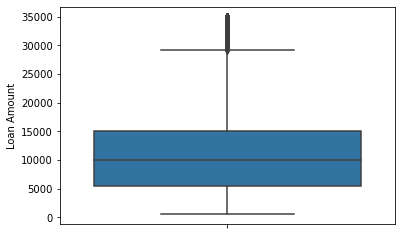

In [35]:
sns.boxplot( y=loan["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

In [36]:
loan["loan_amnt"].describe()

count    35473.000000
mean     11120.724918
std       7327.854809
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

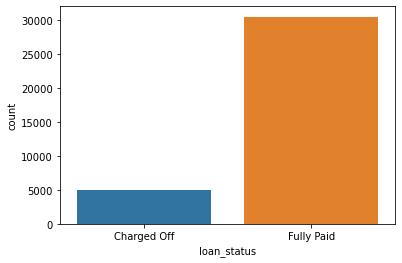

In [37]:
sns.countplot(x= loan["loan_status"])
plt.show() 

In [38]:
## Finding the % of defaulted loans

loan[loan.loan_status == 'Charged Off'].shape[0]/(loan[loan.loan_status == 'Charged Off'].shape[0]+loan[loan.loan_status == 'Fully Paid'].shape[0])

0.14145970174498915

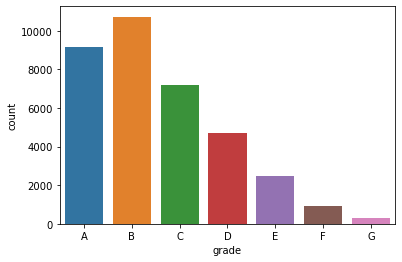

In [39]:
## Finding which Grade of loan has been disbursed the most 
sns.countplot(x='grade', data=loan)
plt.show()

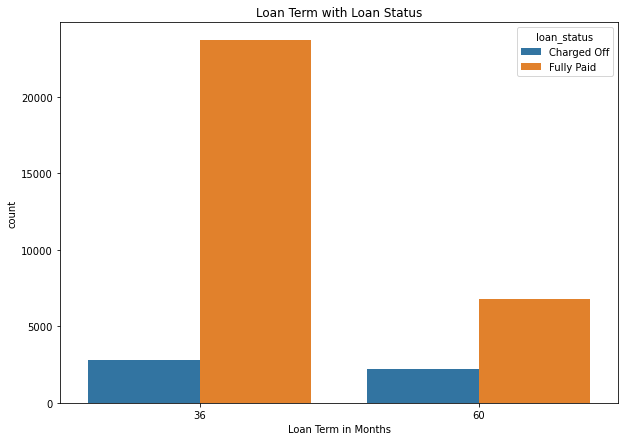

In [40]:
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='loan_status', data=loan)
plt.xlabel('Loan Term in Months')
plt.title('Loan Term with Loan Status')
plt.show()

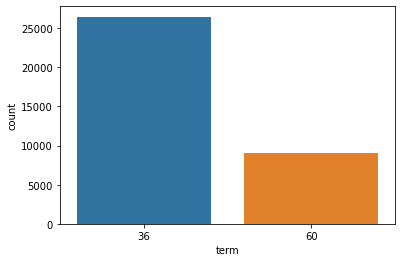

In [41]:
## Finding the distribution of term

sns.countplot(x= loan["term"])
plt.show()

In [42]:
## % of loan with term as 60 months

loan[loan.term == 60].shape[0]/(loan[loan.term == 60].shape[0]+loan[loan.term == 36].shape[0])


0.25393961604600684

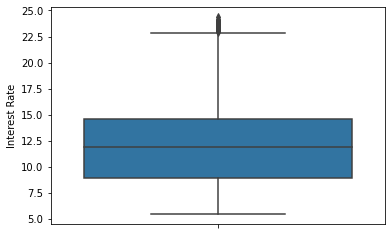

In [43]:
## Plotting Interest Rate boxplot

sns.boxplot( y=loan["int_rate"] )
plt.ylabel('Interest Rate')
plt.show()


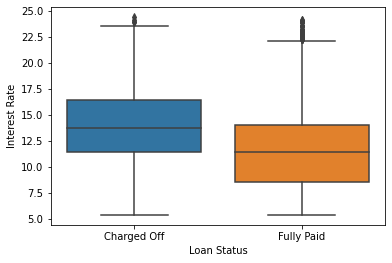

In [44]:
## Plotting Interest Rate boxplot split by loan status 

sns.boxplot(y='int_rate', x='loan_status', data=loan)
plt.ylabel('Interest Rate')
plt.xlabel('Loan Status')
plt.show()

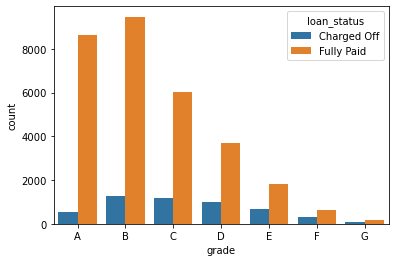

In [48]:
## Plotting Grade with Loan status to check if we identify patterns which can leads us in identifying default


sns.countplot(x='grade', hue="loan_status", data=loan)
plt.show()

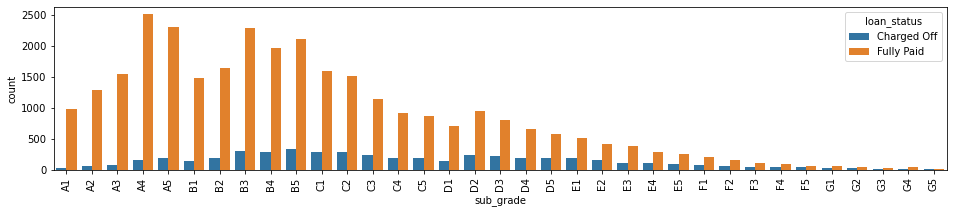

In [49]:
## Plotting ditribution of loans by sub grade 

plt.figure(figsize=(16,3))
sns.countplot(x='sub_grade', hue="loan_status", data=loan)
plt.xticks(rotation=90)
plt.show()

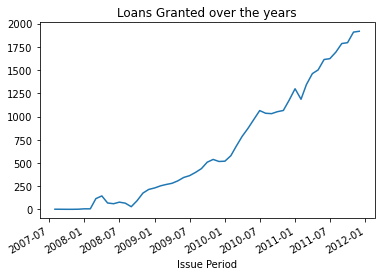

In [50]:
## Plotting to identify loan issuance over the years

g = loan.groupby('issue_d')['loan_status'].count()
g.plot.line(x_compat=True)
plt.title('Loans Granted over the years')
plt.xlabel('Issue Period')
plt.show()

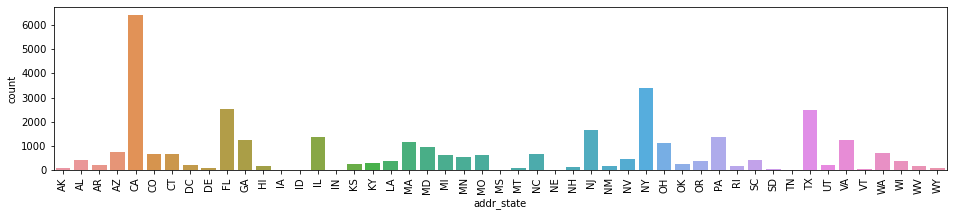

In [51]:
## Finding the distribution of State
plt.figure(figsize=(16,3))
sns.countplot(x='addr_state', data=loan)
plt.xticks(rotation=90)
plt.show()

In [52]:
loan.dti = loan.dti.astype(int)

In [53]:
loan.dti.describe()

count    35473.000000
mean        12.905083
std          6.634192
min          0.000000
25%          8.000000
50%         13.000000
75%         18.000000
max         29.000000
Name: dti, dtype: float64

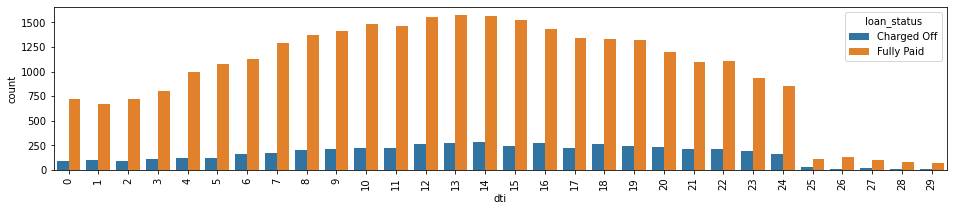

In [65]:
## Plotting DTI with Loan status to check if we identify patterns which can leads us in identifying default

plt.figure(figsize=(16,3))
sns.countplot(x='dti', hue="loan_status", data=loan)
plt.xticks(rotation=90)
plt.show()

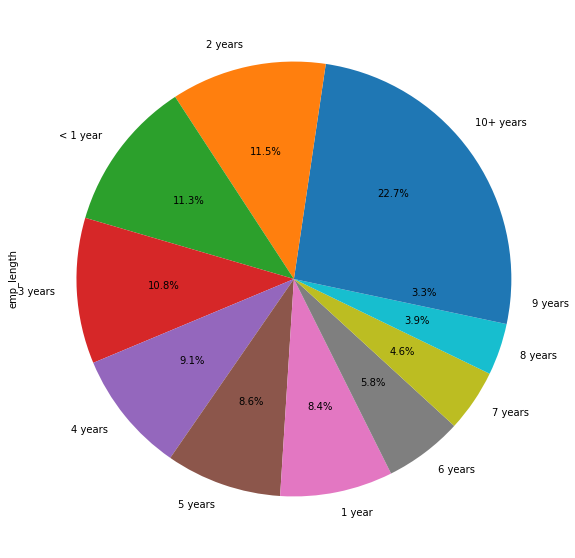

In [55]:
# Emp_Length distriution in the dataset

plt.figure(figsize=(100,10))


data = loan["emp_length"].value_counts()

data.plot.pie(autopct="%.1f%%");

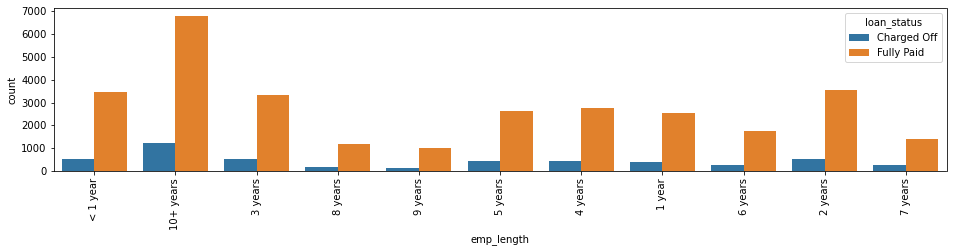

In [56]:
## Plotting Emp_Length with Loan status to check if we identify patterns which can leads us in identifying default

plt.figure(figsize=(16,3))
sns.countplot(x='emp_length', hue="loan_status", data=loan)
plt.xticks(rotation=90)
plt.show()

In [57]:
loan.groupby(["loan_status","purpose"]).size()

loan_status  purpose           
Charged Off  car                     150
             credit_card             481
             debt_consolidation     2541
             educational              47
             home_improvement        301
             house                    54
             major_purchase          195
             medical                  96
             moving                   79
             other                   557
             renewable_energy         16
             small_business          363
             vacation                 49
             wedding                  89
Fully Paid   car                    1247
             credit_card            4148
             debt_consolidation    14408
             educational             234
             home_improvement       2319
             house                   278
             major_purchase         1787
             medical                 528
             moving                  446
             other       

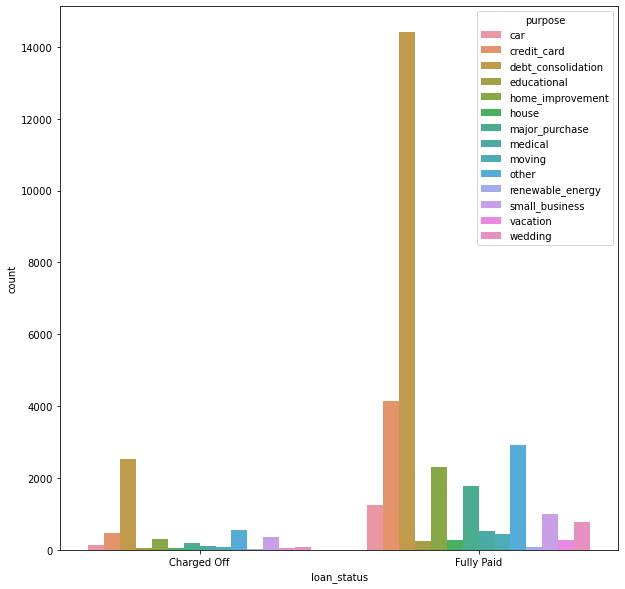

In [58]:
## Plotting Purpose with Loan status to check if we identify patterns which can leads us in identifying default

plt.figure(figsize=(10,10))

sns.countplot(x='loan_status',hue='purpose',data=loan)
plt.show()

In [59]:
## Finding the correlation matrix and identifying if there are variables showing high degree of correlation which we have not explored till now 

corr = loan.corr(method ='pearson')
corr

,loan_amnt,term,int_rate,installment,annual_inc,dti,month,year
loan_amnt,1.000000,0.350228,0.298046,0.930907,0.259300,0.063010,0.051294,0.116807
term,0.350228,1.000000,0.441013,0.091085,0.046125,0.074079,0.029522,0.230305
int_rate,0.298046,0.441013,1.000000,0.274556,0.046519,0.108828,0.023300,0.025948
installment,0.930907,0.091085,0.274556,1.000000,0.256778,0.053979,0.029566,0.062745
annual_inc,0.259300,0.046125,0.046519,0.256778,1.000000,-0.120250,0.006805,0.014686
dti,0.063010,0.074079,0.108828,0.053979,-0.120250,1.000000,0.009480,0.079460
month,0.051294,0.029522,0.023300,0.029566,0.006805,0.009480,1.000000,-0.064212
year,0.116807,0.230305,0.025948,0.062745,0.014686,0.079460,-0.064212,1.000000


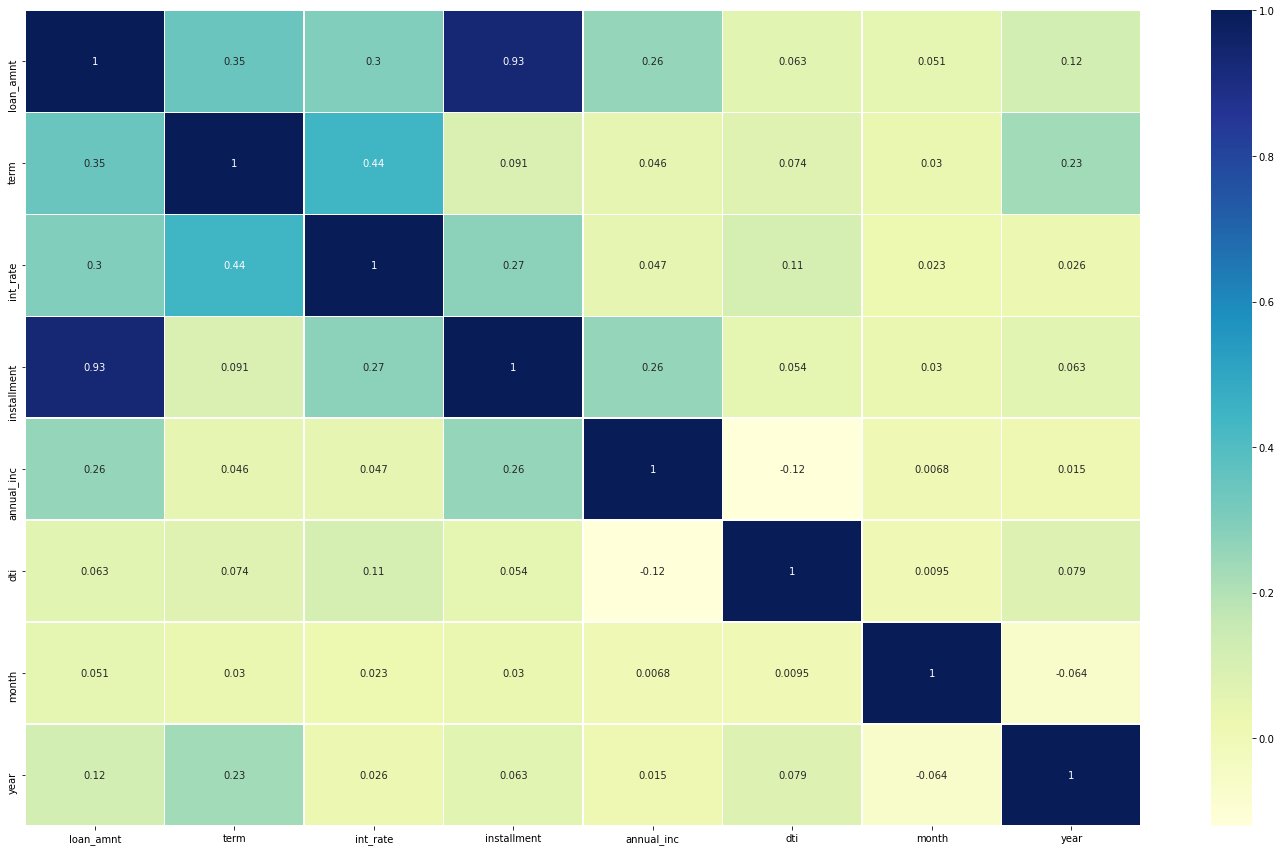

In [60]:
plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True, linewidths=.5, cmap = "YlGnBu")
plt.show()

In [45]:
#    ********************** Bivariate Analysis **********************       

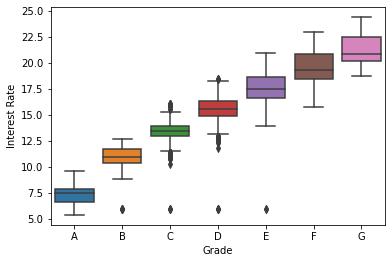

In [46]:
## Plotting Interest Rate box plot split by Grade 

sns.boxplot(y='int_rate', x='grade', data=loan)
plt.ylabel('Interest Rate')
plt.xlabel('Grade')
plt.show()

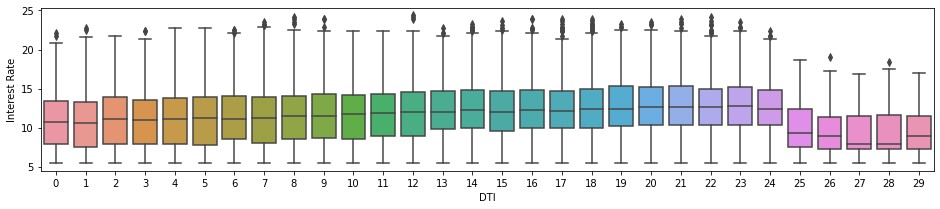

In [69]:
## Plotting Interest Rate box plot split by DTI 
plt.figure(figsize=(16,3))
sns.boxplot(y='int_rate', x='dti', data=loan)
plt.ylabel('Interest Rate')
plt.xlabel('DTI')
plt.show()

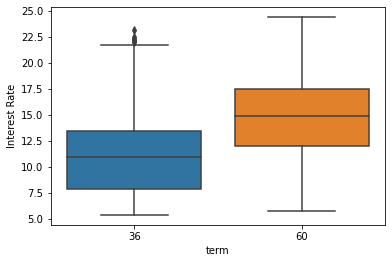

In [71]:
## Plotting Interest Rate Loan Amount split by Grade 

sns.boxplot(y='int_rate', x='term', data=loan)
plt.ylabel('Interest Rate')
plt.xlabel('term')
plt.show()